# Log returns plots

In [1]:
import pandas as pd
import numpy as np
import math
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [13]:
short_window = 21
long_window = 84

with open("data/pairs.pkl", "rb") as file:
    currencies = pkl.load(file)
print(currencies)
#currencies = ["BTC", "ETH", "ALGO", "STORJ", "MANA"]
data = {}

for currency in currencies:
    with open(f"data/Kraken_{currency}USD.pkl", "rb") as file:
        data[currency] = pkl.load(file)

['XMR', 'BAT', 'COMP', 'INJ', 'EWT', 'CTSI', 'XLM', 'ZEC', 'LRC', 'AAVE', 'MKR', 'GHST', 'ETH', 'OCEAN', 'ATOM', 'NANO', 'ICX', 'SUSHI', 'OXT', 'ADA', 'TRX', 'UNI', 'SNX', 'XRP', 'CRV', 'OMG', 'BAND', 'LTC', 'BNT', 'LPT', 'KSM', 'ENJ', 'SAND', 'KAR', 'XTZ', 'KNC', 'CQT', 'MINA', 'BADGER', 'KEEP', 'USDT', 'WAVES', 'LSK', 'SC', 'ZRX', 'BCH', 'GNO', 'REN', 'EOS', 'MLN', 'PAXG', 'DOGE', 'FLOW', '1INCH', 'MATIC', 'ANT', 'REP', 'SOL', 'OGN', 'PERP', 'FIL', 'REPV2', 'DOT', 'DAI', 'YFI', 'GRT', 'CHZ', 'KAVA', 'RARI', 'STORJ', 'ALGO', 'WBTC', 'BAL', 'DASH', 'MIR', 'MANA', 'ETC', 'BTC', 'TBTC', 'QTUM', 'SRM', 'USDC', 'AXS', 'ANKR', 'LINK']


FileNotFoundError: [Errno 2] No such file or directory: 'data/Kraken_XMRUSD.pkl'

In [8]:
def plot_signal(log_returns):
    signal = log_returns["log_returns"].rolling(window=short_window).mean() - log_returns["log_returns"].rolling(window=long_window).mean()
    signal = signal[long_window:]
    plt.plot(log_returns["log_returns"].rolling(window=short_window).mean()[long_window:])
    plt.plot(log_returns["log_returns"].rolling(window=long_window).mean())
    plt.xticks(rotation=45)
    signal[signal<=0] = 0
    return signal

In [5]:
def calc_performance(signal, returns):
    returns = returns[long_window:]
    daily_returns = returns*np.sign(signal)+1
    return daily_returns.cumprod()

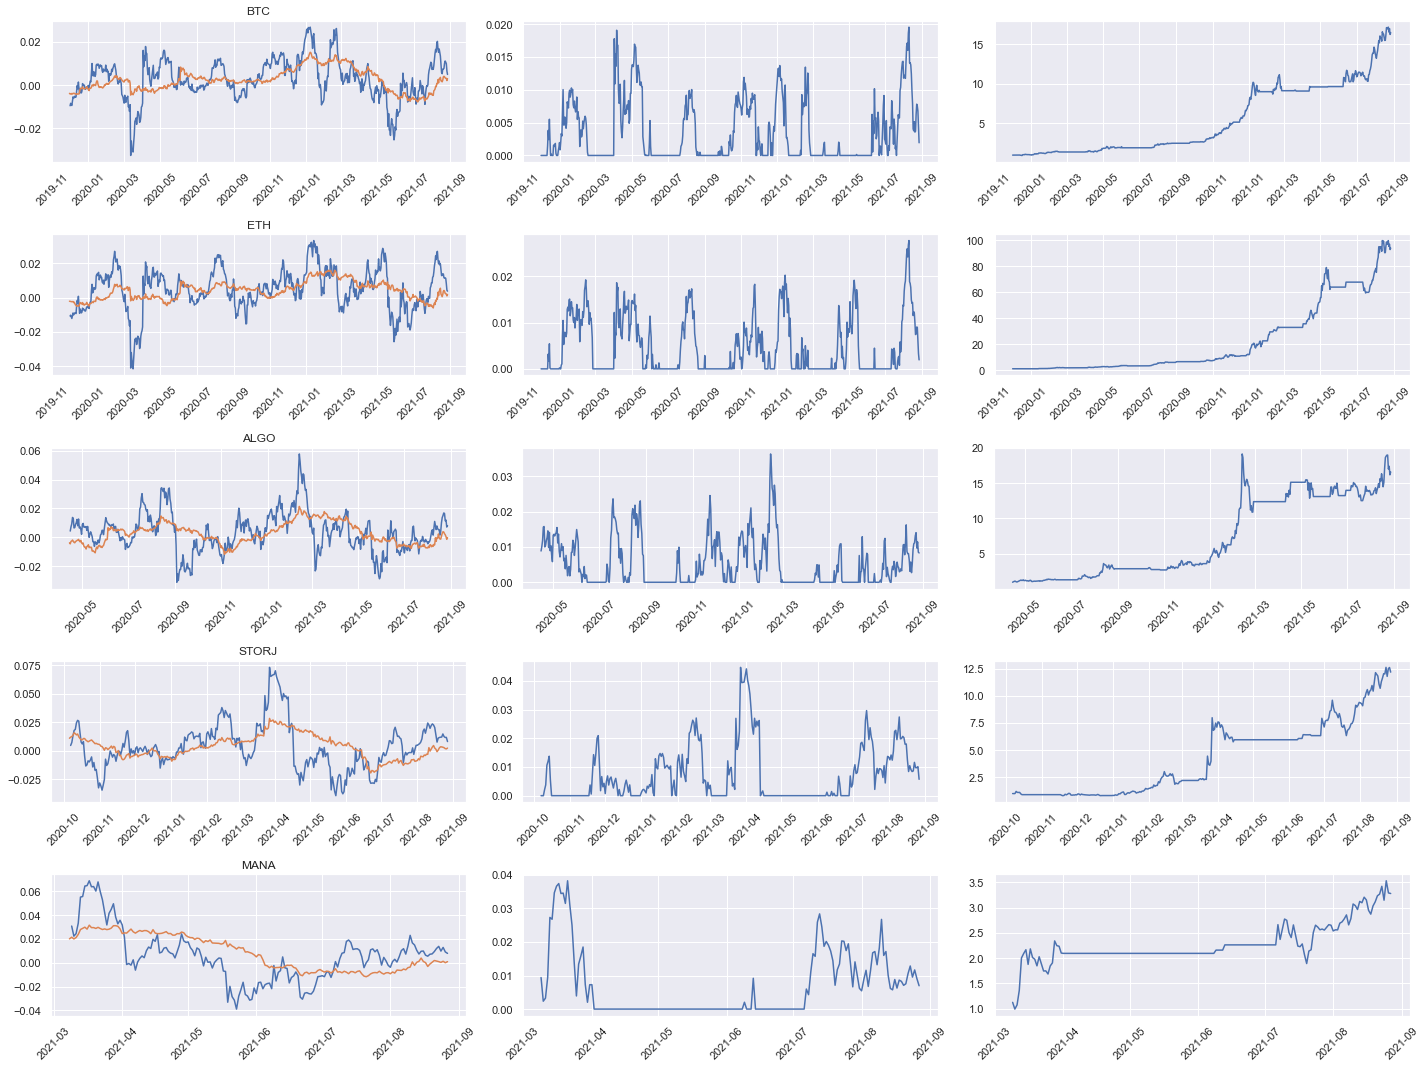

In [9]:
f = plt.figure(figsize=(20, len(data)*3))
gs = f.add_gridspec(len(data), 3)

for idx, currency in enumerate(data):
    ax = f.add_subplot(gs[idx, 0])
    ax.set_title(currency)
    signal = plot_signal(data[currency])

    ax = f.add_subplot(gs[idx, 1])
    plt.plot(signal)
    plt.xticks(rotation=45)

    ax = f.add_subplot(gs[idx, 2])
    plt.plot(calc_performance(signal, data[currency]["close"].pct_change()))
    plt.xticks(rotation=45)

f.tight_layout()
plt.show()